What are the most demanded skills for the top 3 most popular data roles?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast  

In [3]:
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda job_skills: ast.literal_eval(job_skills) if pd.notna(job_skills) else job_skills)

In [4]:
df_US= df[df['job_country']=='United States'].copy()

In [5]:
df_skills = df_US.explode('job_skills')

In [6]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

In [7]:
df_skills_count=  df_skills_count.reset_index(name = 'skills_count')

In [8]:
df_skills_count.sort_values(by= 'skills_count', ascending= False, inplace=True)

In [9]:
df_skills_count

,job_skills,job_title_short,skills_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [10]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

In [11]:
job_titles = sorted(job_titles[:3])

In [12]:
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

plot skill count

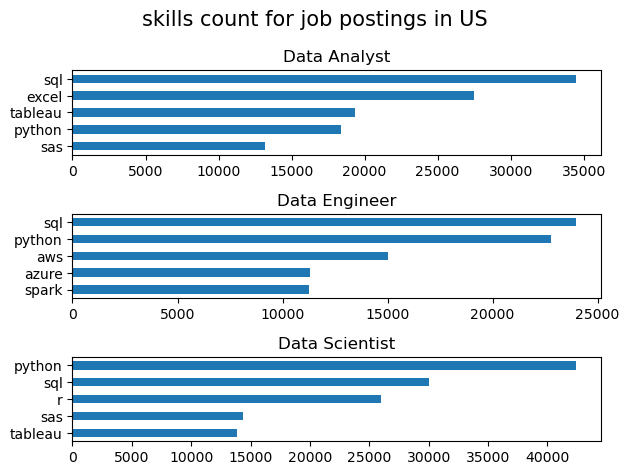

In [13]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind= 'barh', x= 'job_skills', y= 'skills_count', ax = ax[i], title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('skills count for job postings in US', fontsize= 15)
fig.tight_layout()
plt.show()
  


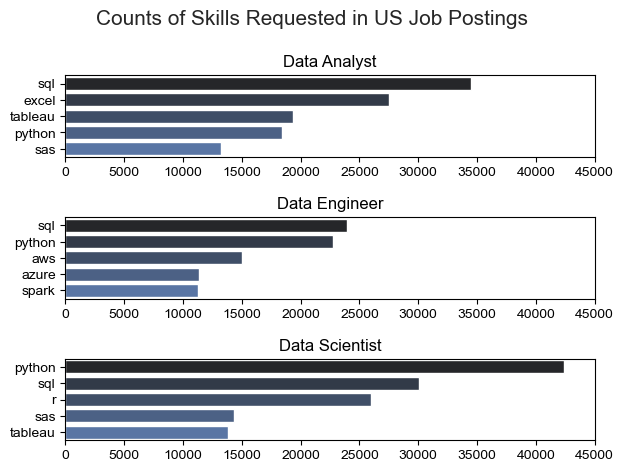

In [14]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style = 'ticks')


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    sns.barplot(data= df_plot, y= 'job_skills', x= 'skills_count',ax= ax[i], palette='dark:b')
    ax[i].set_title(job_title)
    #df_plot.plot(kind= 'barh', x= 'job_skills', y= 'skills_count', ax = ax[i], title= job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 45000)

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize= 15)
fig.tight_layout()
plt.show()

In [15]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name= 'jobs_total')

In [16]:
df_skills_per= pd.merge(df_skills_count, df_job_title_count, on= 'job_title_short', how= 'left')

In [17]:
df_skills_per['skills_per']= df_skills_per['skills_count']/df_skills_per['jobs_total']*100

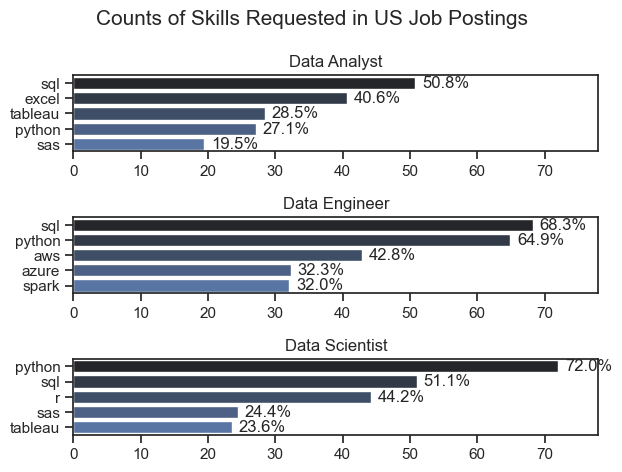

In [18]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style = 'ticks')


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_per[df_skills_per['job_title_short'] == job_title].head(5)
    sns.barplot(data= df_plot, y= 'job_skills', x= 'skills_per',ax= ax[i], palette='dark:b')
    ax[i].set_title(job_title)
    #df_plot.plot(kind= 'barh', x= 'job_skills', y= 'skills_count', ax = ax[i], title= job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_xlim(0, 78)

    for n,v in enumerate(df_plot['skills_per']):
     ax[i].text(v+1, n, f'{v:.1f}%', va='center')

if i!=len(job_titles)-1:
   ax[i].set_xticks([])
fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize= 15)
fig.tight_layout()
plt.show()

